# DATA_ANALYSIS_USING_SPARKSQL

In [1]:
import pyspark
from pyspark.sql import SparkSession

from pyspark.sql.types import *
from pyspark.sql.functions import *  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
spark = SparkSession \
    .builder \
    .appName("SPARK_ANALYSIS") \
    .config("spark.sql.execution.arrow.pyspark.enabled","True")\
    .getOrCreate()
spark
#spark.sparkContext.getConf().getAll()

In [3]:
#using the 'emp' database and displaying the tables present in he database via spark sql
spark.sql("use emp")
spark.sql("show tables").limit(15).toPandas()

,database,tableName,isTemporary
0,emp,departments,False
1,emp,dept_emp,False
2,emp,dept_manager,False
3,emp,employees,False
4,emp,salaries,False
5,emp,titles,False


In [4]:
#viewing first few records of the departments table
spark.sql("SELECT * FROM departments").limit(15).toPandas()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [5]:
#viewing first few records of the employees table
spark.sql("SELECT * FROM employees limit 10").limit(15).toPandas()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,2,A,0,None
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,1,C,0,None
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,9,A,0,None
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,2,C,0,None
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,6,B,0,None
5,263976,e0003,10/30/1959,Eran,Cusworth,M,11/14/1986,8,B,1,8/21/1993
6,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,10,A,0,None
7,461591,s0002,11/17/1964,Xudong,Samarati,M,11/13/1985,2,A,1,8/21/1994
8,477657,e0002,12/18/1962,Lihong,Magliocco,M,10/23/1993,5,A,0,None
9,219881,s0002,4/24/1956,Kwangyoen,Speek,F,2/14/1993,6,B,0,None


In [6]:
# A list showing employee number, last name, first name, sex, and salary for each employee1.

spark.sql("SELECT s.emp_no, e.last_name, e.first_name, e.sex, s.salary \
                FROM employees as e \
                INNER JOIN salaries as s \
                ON s.emp_no = e.emp_no \
                ORDER By s.emp_no ").limit(15).toPandas()

,emp_no,last_name,first_name,sex,salary
0,10001,Facello,Georgi,M,60117
1,10002,Simmel,Bezalel,F,65828
2,10003,Bamford,Parto,M,40006
3,10004,Koblick,Chirstian,M,40054
4,10005,Maliniak,Kyoichi,M,78228
5,10006,Preusig,Anneke,F,40000
6,10007,Zielinski,Tzvetan,F,56724
7,10008,Kalloufi,Saniya,M,46671
8,10009,Peac,Sumant,F,60929
9,10010,Piveteau,Duangkaew,F,72488


In [7]:
#List employees who were hired in 1986

spark.sql("SELECT emp_no, first_name, last_name, hire_date \
                FROM employees \
                WHERE hire_date \
                BETWEEN '1/1/1986' AND '12/31/1986' \
                ORDER BY hire_date ").limit(15).toPandas()

,emp_no,first_name,last_name,hire_date
0,471203,Jianhao,Serot,1/1/1986
1,88386,Jiann,Bondorf,1/1/1986
2,415376,Sungwon,Range,1/1/1986
3,47413,Nirmal,Comyn,1/1/1986
4,42013,Tianruo,Demri,1/1/1986
5,108318,Poorav,Papastamatiou,1/1/1986
6,200640,Shahar,Waterhouse,1/1/1986
7,417105,Lijia,Rettelbach,1/1/1986
8,13415,Nathalie,Speer,1/1/1986
9,496085,Yongqiao,Reinhard,1/1/1986


In [8]:
# List the manager of each department with the following information: department number, department name, the manager's employee number, last name, first name.
    
spark.sql("SELECT departments.dept_no, departments.dept_name, dept_manager.emp_no, employees.last_name, employees.first_name \
                FROM departments \
                JOIN dept_manager ON departments.dept_no = dept_manager.dept_no \
                JOIN employees ON dept_manager.emp_no = employees.emp_no \
                ORDER BY dept_no").limit(15).toPandas()

,dept_no,dept_name,emp_no,last_name,first_name
0,d001,Marketing,110039,Minakawa,Vishwani
1,d001,Marketing,110022,Markovitch,Margareta
2,d002,Finance,110085,Alpin,Ebru
3,d002,Finance,110114,Legleitner,Isamu
4,d003,Human Resources,110183,Ossenbruggen,Shirish
5,d003,Human Resources,110228,Sigstam,Karsten
6,d004,Production,110303,Wegerle,Krassimir
7,d004,Production,110386,Kieras,Shem
8,d004,Production,110344,Cools,Rosine
9,d004,Production,110420,Ghazalie,Oscar


In [9]:
# List the department of each employee with the following information:employee number, last name, first name, and department name.

spark.sql("SELECT d.emp_no, e.last_name, e.first_name, dt.dept_name \
                FROM dept_emp  d \
                JOIN employees  e ON d.emp_no = e.emp_no \
                JOIN departments dt ON d.dept_no = dt.dept_no ").limit(15).toPandas()

,emp_no,last_name,first_name,dept_name
0,473302,Zallocco,Hideyuki,Finance
1,475053,Delgrande,Byong,Production
2,57444,Babb,Berry,Production
3,421786,Verhoeff,Xiong,Human Resources
4,282238,Baumann,Abdelkader,Quality Management
5,263976,Cusworth,Eran,Quality Management
6,273487,Parfitt,Christoph,Human Resources
7,461591,Samarati,Xudong,Finance
8,477657,Magliocco,Lihong,Quality Management
9,219881,Speek,Kwangyoen,Customer Service


In [10]:
# List first name, last name, and sex for employees whose first name is "Hercules" and last names begin with "B."

spark.sql("SELECT employees.first_name, employees.last_name, employees.sex \
                FROM employees \
                WHERE first_name = 'Hercules' AND last_name \
                Like 'B%'").limit(15).toPandas()

,first_name,last_name,sex
0,Hercules,Baer,M
1,Hercules,Biron,F
2,Hercules,Birge,F
3,Hercules,Berstel,F
4,Hercules,Bernatsky,M
5,Hercules,Bail,F
6,Hercules,Bodoff,M
7,Hercules,Benantar,F
8,Hercules,Basagni,M
9,Hercules,Bernardinello,F


In [11]:
# List all employees in the Sales department, including their employee number, last name, first name, and department name.

spark.sql("SELECT departments.dept_name, employees.last_name, employees.first_name \
                FROM dept_emp \
                JOIN employees ON dept_emp.emp_no = employees.emp_no \
                JOIN departments ON dept_emp.dept_no = departments.dept_no \
                WHERE departments.dept_name = 'Sales'").limit(15).toPandas()

,dept_name,last_name,first_name
0,Sales,Bultermann,Subbu
1,Sales,Demizu,Nevio
2,Sales,Asmuth,Ziya
3,Sales,Yoshizawa,Kellyn
4,Sales,Perl,Elliott
5,Sales,Nollmann,Gad
6,Sales,Verspoor,Giap
7,Sales,Beutelspacher,Duro
8,Sales,Swick,Harngdar
9,Sales,Covnot,Nectarios


In [12]:
# List all employees in the Sales and Development departments, including their employee number, last name, first name, and department name.

spark.sql("SELECT dept_emp.emp_no, employees.last_name, employees.first_name, departments.dept_name \
                FROM dept_emp \
                JOIN employees ON dept_emp.emp_no = employees.emp_no \
                JOIN departments ON dept_emp.dept_no = departments.dept_no \
                WHERE departments.dept_name = 'Sales' OR departments.dept_name = 'Development'").limit(15).toPandas()

,emp_no,last_name,first_name,dept_name
0,246449,Bultermann,Subbu,Sales
1,205246,Demizu,Nevio,Sales
2,476443,Asmuth,Ziya,Sales
3,424270,Yoshizawa,Kellyn,Sales
4,280408,Perl,Elliott,Sales
5,289261,Nollmann,Gad,Sales
6,444985,Verspoor,Giap,Sales
7,477628,Beutelspacher,Duro,Sales
8,42625,Swick,Harngdar,Sales
9,85093,Covnot,Nectarios,Sales


In [13]:
# In descending order, list the frequency count of employee last names, i.e., how many employees share each last name.

spark.sql("SELECT last_name,count(last_name) as Frequency \
                FROM employees \
                GROUP BY last_name \
                ORDER BY frequency desc").limit(15).toPandas()

,last_name,Frequency
0,Baba,226
1,Gelosh,223
2,Coorg,223
3,Farris,222
4,Sudbeck,222
5,Adachi,221
6,Osgood,220
7,Masada,218
8,Neiman,218
9,Mandell,218


# Histogram to show the salary distribution among the employees

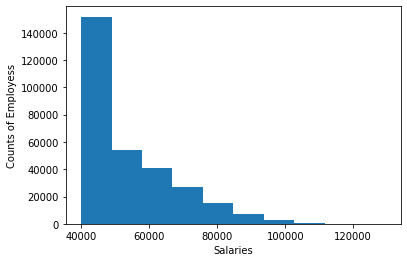

In [15]:
#histogram to show the salaries

plt.hist(spark.sql("SELECT salary FROM salaries").toPandas().values)
plt.xlabel('Salaries')
plt.ylabel('Counts of Employess')
plt.show()

In [16]:
# Bar graph to show the average salary per title with respect to designation

avg_salary = spark.sql("SELECT t1.title, avg(t3.salary) as average_salary \
                                        FROM titles t1 inner \
                                        JOIN employees t2 on t1.title_id = t2.emp_title_id \
                                        INNER JOIN salaries t3 on t2.emp_no=t3.emp_no \
                                        GROUP BY t1.title \
                                        ORDER BY average_salary").limit(15).toPandas()
avg_salary

,title,average_salary
0,Senior Engineer,48506.799871
1,Engineer,48535.336511
2,Assistant Engineer,48564.434447
3,Technique Leader,48582.896092
4,Manager,51531.041667
5,Staff,58465.382850
6,Senior Staff,58550.172704


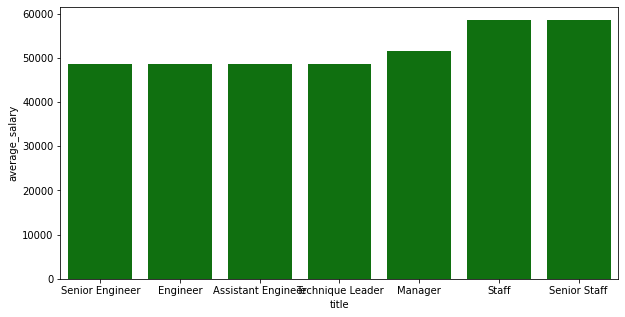

In [29]:
plt.figure(figsize=(10, 5)) 
sns.barplot(x = avg_salary.title, y = avg_salary.average_salary, color = 'green')
plt.show()

# Calculate employee tenure & show the tenure distribution among the employees.

In [18]:
#  Gender distribution of employees

spark.sql(" SELECT sex as gender , COUNT(emp_no) FROM employees GROUP BY sex").limit(15).toPandas()

,gender,count(emp_no)
0,F,120051
1,M,179973


In [19]:
# Average salary of employees based on gender.

spark.sql("SELECT employees.sex as gender, avg(salaries.salary) as average_salary \
                FROM employees join salaries on employees.emp_no = salaries.emp_no \
                GROUP BY employees.sex""").limit(15).toPandas()

,gender,average_salary
0,F,52953.836428
1,M,52982.002945


In [20]:
# Number of employees according to desingnation.

spark.sql("SELECT titles.title, COUNT(employees.emp_no)  \
                FROM titles JOIN employees ON titles.title_id = employees.emp_title_id \
                GROUP BY(titles.title)").limit(15).toPandas()

,title,count(emp_no)
0,Staff,107384
1,Assistant Engineer,5835
2,Senior Staff,26583
3,Senior Engineer,97747
4,Engineer,47303
5,Manager,24
6,Technique Leader,15148


In [21]:
# Highest paid employees in the organization.

spark.sql("SELECT employees.first_name, employees.last_name, sum(salaries.salary) \
                FROM employees left join salaries on employees.emp_no = salaries.emp_no \
                GROUP BY employees.first_name, employees.last_name \
                ORDER BY sum(salaries.salary) desc").limit(15).toPandas()

,first_name,last_name,sum(salary)
0,Mohammad,Ullian,267002
1,Bartek,Garnier,259201
2,Rosalyn,Baalen,257234
3,Radoslaw,Pfau,254066
4,Gad,Krone,251992
5,Divine,Ebeling,248562
6,Iara,Breugel,246766
7,Eben,Francisci,243202
8,Yonghong,Codenie,241874
9,Zongyan,DiGiano,241645


In [22]:
# Count of employees based on their performance rating.

spark.sql("SELECT Last_performance_rating , COUNT(emp_no) \
                FROM employees  \
                GROUP BY last_performance_rating").limit(15).toPandas()

,Last_performance_rating,count(emp_no)
0,B,107154
1,C,71304
2,A,95919
3,S,10542
4,PIP,15105
